In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("titanic.csv")
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
data.shape

(891, 25)

##### Check for any missing values

In [5]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

##### Seperating the Independent &  Dependent(Target) variable

In [6]:
X = data.drop(["Survived"], axis=1 )#Independent variables
y = data["Survived"] #Target Variable

##### To create test Set, imort the train test function

In [7]:
from sklearn.model_selection import train_test_split
#By eqauting stratify=y, we can make the distribution same in train and test sets w.r.t "y" i.e the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101, stratify= y)

##### Distribution in Training and Testing Set

In [8]:
print("-" *75)
print("Distribution in Training Set:")
print(y_train.value_counts(normalize=True))
print("-" *75)
print("Distribution in Testing Set:")
print(y_test.value_counts(normalize=True))
print("-" *75)

---------------------------------------------------------------------------
Distribution in Training Set:
0    0.616766
1    0.383234
Name: Survived, dtype: float64
---------------------------------------------------------------------------
Distribution in Testing Set:
0    0.61435
1    0.38565
Name: Survived, dtype: float64
---------------------------------------------------------------------------


##### Shape of Training Set and Testing Set

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 24), (223, 24), (668,), (223,))

##### import Decisiontree classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
model = DecisionTreeClassifier(random_state=10)
#Fitting the model
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

##### checking the training and testing score

In [11]:
print("-"*50)
print("Training Score:", model.score(X_train,y_train))
print("Testing Score:", model.score(X_test,y_test))
print("-"*50)

--------------------------------------------------
Training Score: 0.9880239520958084
Testing Score: 0.7533632286995515
--------------------------------------------------


- As seen above, The Training accuracy is high as compared to the testing accuracy

### Optimize the performance of DecisionTress: 
1. Optimising max_depth
2. Optimising max_leaf nodes

#### 1.Optimising max_depth

In [12]:
train_accuracy = []
test_accuracy = []
#Take the range of the max_depth 1-10 and checck its train_accuracy and test_accuracy
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train,y_train)
    train_accuracy.append(dt_model.score(X_train,y_train))
    test_accuracy.append(dt_model.score(X_test,y_test))    
frame = pd.DataFrame({"max_depth": range(1,10), "train_accuracy" : train_accuracy, "test_accuracy": test_accuracy})
frame

,max_depth,train_accuracy,test_accuracy
0,1,0.803892,0.735426
1,2,0.803892,0.735426
2,3,0.830838,0.766816
3,4,0.847305,0.771300
4,5,0.847305,0.771300
5,6,0.863772,0.775785
6,7,0.889222,0.780269
7,8,0.911677,0.784753
8,9,0.931138,0.775785


Text(0, 0.5, 'performance')

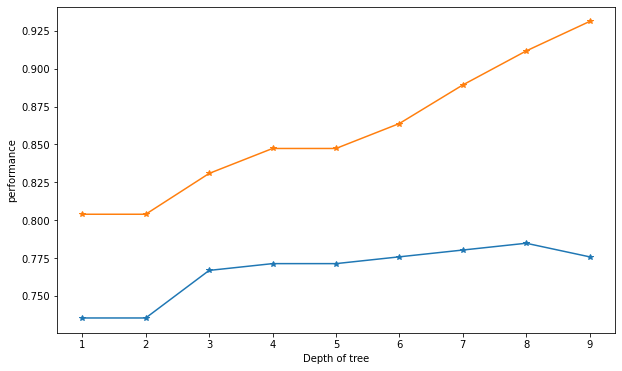

In [13]:
#Plot the train_accuracy and test_accuracy w.r.t max_depth
plt.figure(figsize=(10,6))
plt.plot(frame['max_depth'], frame['test_accuracy'], marker='*')
plt.plot(frame['max_depth'], frame['train_accuracy'], marker='*')
plt.xlabel('Depth of tree')
plt.ylabel('performance')

- Keeping the low value of max_depth, didnt allow the model to learn the pattern. Hence low prformance or Underfitting
- Magnitude of increase in Training accuracy is higher as compared to that with the Testing accuracy-
- **Max_depth= 8** produces the **highest Testing accuracy**,Hence can set the **max_depth = 8**

#### 2.Optimising max_leaf nodes

###### Keeping the max_depth = 8, lets check the max_leaf node parameter to get highest teating accuracy

In [14]:
train_accuracy = []
test_accuracy = []
#Keeping the max_depth = 8,take the range of the max_leaf_nodes(5,35,5) and check its train_accuracy and test_accuracy
for leaf_nodes in range(5,35,5):
    dt_model = DecisionTreeClassifier(max_leaf_nodes=leaf_nodes, max_depth=8, random_state=10)
    dt_model.fit(X_train,y_train)
    train_accuracy.append(dt_model.score(X_train,y_train))
    test_accuracy.append(dt_model.score(X_test,y_test))    
frame = pd.DataFrame({"max_depth": 8,"max_leaf_nodes": range(5,35,5), "train_accuracy" : train_accuracy, "test_accuracy": test_accuracy})
frame

,max_depth,max_leaf_nodes,train_accuracy,test_accuracy
0,8,5,0.826347,0.762332
1,8,10,0.841317,0.766816
2,8,15,0.853293,0.789238
3,8,20,0.865269,0.811659
4,8,25,0.880240,0.811659
5,8,30,0.889222,0.811659


#### Cross Checking the Training Score and Testing Score

In [15]:
print("-"*50)
print("Training Score:", dt_model.score(X_train,y_train))
print("Testing Score:", dt_model.score(X_test,y_test))
print("-"*50)

--------------------------------------------------
Training Score: 0.8892215568862275
Testing Score: 0.8116591928251121
--------------------------------------------------


Text(0, 0.5, 'performance')

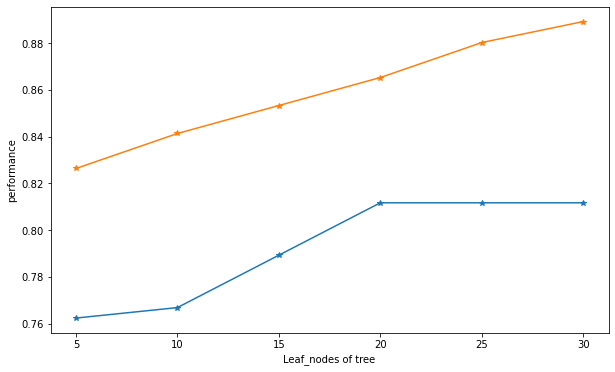

In [16]:
plt.figure(figsize=(10,6))
plt.plot(frame['max_leaf_nodes'],frame['test_accuracy'], marker='*')
plt.plot(frame['max_leaf_nodes'],frame['train_accuracy'], marker='*')
plt.xlabel('Leaf_nodes of tree')
plt.ylabel('performance')

- it can thus be observed that the test_accuracy is maximum at 0.811659 when max_leaf_nodes= 20 and thereafter remains constant.
- Hence we can take max_leaf_nodes as 20,25 0r 30.

#### Using GridSearchCV, Optimise the hper parameters to get the to get highest teating accuracy

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
para = {#"min_samples_split":[int(x) for x in range(0,14,2)],
       "max_leaf_nodes": [int(x) for x in np.linspace(5,35,7)],
       "max_depth" :[8]}

In [19]:
dt_GridSearch = GridSearchCV(dt_model, param_grid= para, scoring= "accuracy", n_jobs= -1, cv=3, verbose=2)

In [20]:
dt_GridSearch.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   10.1s finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=8, max_leaf_nodes=30,
                                              random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [8],
                         'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 35]},
             scoring='accuracy', verbose=2)

In [21]:
print("-"*50)
print("Training Score:", dt_GridSearch.score(X_train,y_train))
print("Testing Score:", dt_GridSearch.score(X_test,y_test))
print("-"*50)

--------------------------------------------------
Training Score: 0.8652694610778443
Testing Score: 0.8116591928251121
--------------------------------------------------


- The accuracy scores are more in sync as compared to what we got previously

In [22]:
dt_GridSearch.best_params_

{'max_depth': 8, 'max_leaf_nodes': 20}

In [23]:
dt_GridSearch.best_estimator_

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=20, random_state=10)

- Using GridSearchCV, we have got the max_leaf_nodes=20

#### Plot a Decision Tree using the best_estimators

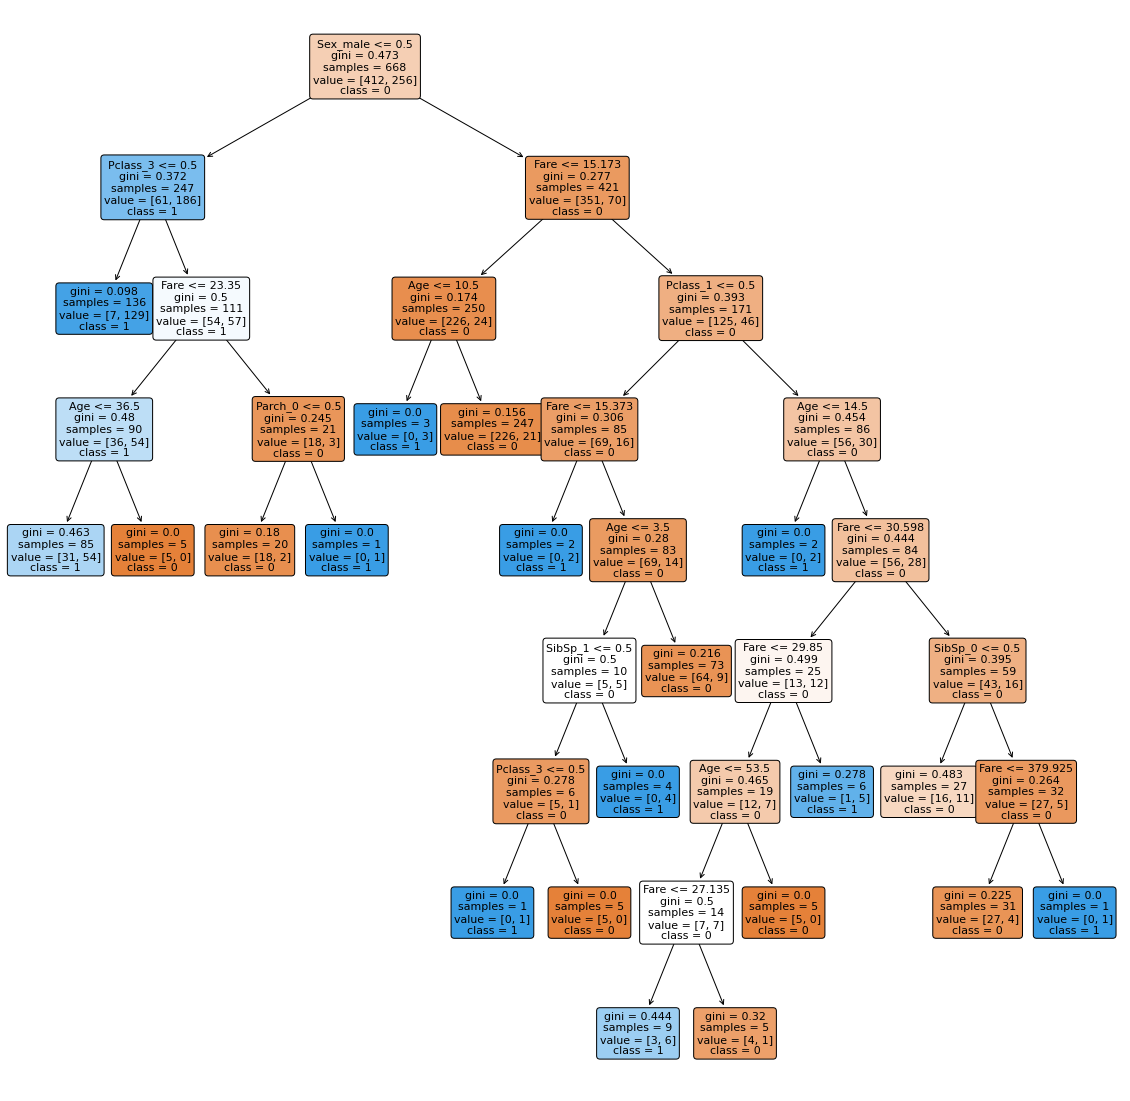

In [24]:
plt.figure(figsize=(20,20))
plot_tree(dt_GridSearch.best_estimator_, feature_names= X.columns,class_names=['0','1'],filled=True, fontsize=11, rounded= True)
plt.show()

#### Exporting Decision Trees in Textual Format

In [25]:
print(tree.export_text(dt_GridSearch.best_estimator_,feature_names=list(X.columns)))

|--- Sex_male <= 0.50
|   |--- Pclass_3 <= 0.50
|   |   |--- class: 1
|   |--- Pclass_3 >  0.50
|   |   |--- Fare <= 23.35
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  36.50
|   |   |   |   |--- class: 0
|   |   |--- Fare >  23.35
|   |   |   |--- Parch_0 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Parch_0 >  0.50
|   |   |   |   |--- class: 1
|--- Sex_male >  0.50
|   |--- Fare <= 15.17
|   |   |--- Age <= 10.50
|   |   |   |--- class: 1
|   |   |--- Age >  10.50
|   |   |   |--- class: 0
|   |--- Fare >  15.17
|   |   |--- Pclass_1 <= 0.50
|   |   |   |--- Fare <= 15.37
|   |   |   |   |--- class: 1
|   |   |   |--- Fare >  15.37
|   |   |   |   |--- Age <= 3.50
|   |   |   |   |   |--- SibSp_1 <= 0.50
|   |   |   |   |   |   |--- Pclass_3 <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Pclass_3 >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- SibSp_1 >  0.50
|   |   |   |   |  